<h1 style="color:dodgerblue; font-size:275%">NFL Offense Statistics</h1></br>
<p style="color:darkgray; font-weight:bold"> Using BeautifulSoup to scrape Wikipedia for a data table, then Pandas and Matplotlib to visualize that data</p></br> 
<p style="color:darkblack; font-weight:bold"> Project Description:This program will scrape the Pro-Football Reference of the Passing, Rushing, and Receiving pages. The data will then used to generate a graph of the offensive players statistics such as Yards, Touchdowns, .</p>

<h2 style="color:tomato">Web Scraping</h2>

<h3 style="color:coral">Initial imports, setup, url assignment, and BeautifulSoup scrape</h3>

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, model_selection, svm, naive_bayes
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets


In [2]:
def formatType(t):
  if "." in t and t.isdigit():
    return float(t);
  elif (t.isdigit() and (not "." in t or '-' in t)):
    return int(t)
  else:
    return t.upper()

In [3]:
def extractDatasetToDF(path, id, tc, index):
  page=requests.get(path).text
  soup=BeautifulSoup(page,"html.parser")
  table= soup.find("table",{"id":id})
  # table= soup.find("tbody")
  data=[]
  rows = table.findAll('tr')
  for i,row in enumerate(rows[1:len(rows)]):
    if "Rk" in row.getText():
      continue
    column=row.find_all('td')
    row_wise=[]
    for cell in column[:len(tc)]:
      temp=cell.get_text(' ', strip=True).replace("(","#").replace(")","").replace(",","").replace("","").split("#")
      row_wise+=[formatType(tmp) for tmp in temp]
    data+=[row_wise]
    df = pd.DataFrame(data, columns = tc) if "" in index else pd.DataFrame(data, columns = tc, index = index);
  return df


In [4]:
import random as r
colour =  ['aliceblue',' antiquewhite',' aqua',' aquamarine',' azure','beige',' bisque',' black',' blanchedalmond',' blue','blueviolet',' brown',' burlywood',' cadetblue','chartreuse',' chocolate',' coral',' cornflowerblue','cornsilk',' crimson',' cyan',' darkblue',' darkcyan','darkgoldenrod',' darkgray',' darkgrey',' darkgreen','darkkhaki',' darkmagenta',' darkolivegreen',' darkorange','darkorchid',' darkred',' darksalmon',' darkseagreen','darkslateblue',' darkslategray',' darkslategrey','darkturquoise',' darkviolet',' deeppink',' deepskyblue','dimgray',' dimgrey',' dodgerblue',' firebrick','floralwhite',' forestgreen',' fuchsia',' gainsboro','ghostwhite',' gold',' goldenrod',' gray',' grey',' green','greenyellow',' honeydew',' hotpink',' indianred',' indigo','ivory',' khaki',' lavender',' lavenderblush',' lawngreen','lemonchiffon',' lightblue',' lightcoral',' lightcyan','lightgoldenrodyellow',' lightgray',' lightgrey','lightgreen',' lightpink',' lightsalmon',' lightseagreen','lightskyblue',' lightslategray',' lightslategrey','lightsteelblue',' lightyellow',' lime',' limegreen','linen',' magenta',' maroon',' mediumaquamarine','mediumblue',' mediumorchid',' mediumpurple','mediumseagreen',' mediumslateblue',' mediumspringgreen','mediumturquoise',' mediumvioletred',' midnightblue','mintcream',' mistyrose',' moccasin',' navajowhite',' navy','oldlace',' olive',' olivedrab',' orange',' orangered','orchid',' palegoldenrod',' palegreen',' paleturquoise','palevioletred',' papayawhip',' peachpuff',' peru',' pink','plum',' powderblue',' purple',' red',' rosybrown','royalblue',' rebeccapurple',' saddlebrown',' salmon','sandybrown',' seagreen',' seashell',' sienna',' silver','skyblue',' slateblue',' slategray',' slategrey',' snow','springgreen',' steelblue',' tan',' teal',' thistle',' tomato','turquoise',' violet',' wheat',' white',' whitesmoke','yellow',' yellowgreen']
def getColour():
  i = r.randrange(0,len(colour)-1)
  return colour[i]

getColour()

' steelblue'

In [5]:
from re import search
def getSubStringUpToN(name, N): # N is index-inclusive range (0 - N)
  return name[:N]

In [6]:
def splitBySpace(name):
  t = name
  if search("\*", name):
    t = name.replace("*", str(""))
  if search("\+", name):
    t = name.replace("+", str(""))
  return t.strip().split(" ")
# getSubStringUpToN(,1)

In [7]:
passingCols=["Player","Tm","Age","Pos","G","GS",
             "QBrec","Cmp","Att","Cmp%",
             "Yds","TD","TD%","Int","Int%","1D","Lng","Y/A","AY/A","Y/C",
             "Y/G","Rate","QBR","Sk","Yds-Sk","Sk%","NY/A","ANY/A","4QC","GWD"
             ] #yds at 10
rushingCols=['Player', 'Tm', 'Age', "Pos", "G", "GS", "Att", "Yds", "TD", "1D", "Lng", "Y/A", "Y/G", "Fmb"] #Yds at 8
receivingCols = ['Player', "Tm", 'Age', 'Pos', "G", 'GS', 'Tgt', 'Rec', 'Ctch%', 'Yds', 'Y/R', 'TD', '1D', 'Lng', 'Y/Tgt', 'R/G', 'Y/G', 'Fmb'] #yds at 9

fantasyPassingCols = [
                      'Date','G#','Week','Age','Tm','','Opp','Result','GS',
                      'Cmp','Att','Cmp%','Yds','TD','Int','Rate','Sk','Yds','Y/A','AY/A',
                      'r_Att','r_Yds','r_Y/A','r_TD',
                      'S_TD','Pts',
                      'Fmb','FL','FF','FR','Fmb_Yds','Fmb_TD',
                      'Off_Num','Off_Pct',
                      'Def_Num','Def_Pct',
                      'ST_Num','ST_Pct'
                      ]

fantasyReceivingCols = [
                        'Date','G#','Week','Age','Tm','','Opp','Result','GS',
                        'Tgt','Rec','Yds','Y/R','TD','Ctch%','Y/Tgt',
                        'Att','R_Yds','Y/A','R_TD',
                        'Rt','KR_Yds','Y/Rt','KR_TD',
                        'Ret','Yds','Y/R','PR_TD',
                        'S_TD','Pts',
                        'Sk','Solo','Ast','Comb','TFL','QBHits',
                        'Fmb','FL','FF','FR','Fmb_Yds','Fmb_TD',
                        'Off_Num','Off_Pct',
                        'Def_Num','Def_Pct',
                        'ST_Num','ST_Pct','Status'
                        ]
fantasyRushingCols = [
                     'Date','G#','Week','Age','Tm','','Opp','Result','GS',
                      'Att','Yds','Y/A','TD',
                      'Tgt','Rec','r_Yds','Y/R','r_TD','Ctch%','Y/Tgt',
                      'S_TD','Pts',
                      'Fmb','FL','FF','FR','Fmb_Yds','Fmb_TD',
                      'Off_Num','Off_Pct',
                      'Def_Num','Def_Pct',
                      'ST_Num','ST_Pct'
                     ]

In [8]:
passingTableDF=extractDatasetToDF('https://www.pro-football-reference.com/years/2021/passing.htm', 'passing', passingCols, "")
rushingTableDF=extractDatasetToDF('https://www.pro-football-reference.com/years/2021/rushing.htm', 'rushing', rushingCols, "")
receivingTableDF=extractDatasetToDF('https://www.pro-football-reference.com/years/2021/receiving.htm', 'receiving',receivingCols, "")
receivingTableDF

,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb
0,COOPER KUPP *+,LAR,28,WR,17,17,191,145,75.9%,1947,13.4,16,89,59,10.2,8.5,114.5,0
1,DAVANTE ADAMS *+,GNB,29,WR,16,16,169,123,72.8%,1553,12.6,11,84,59,9.2,7.7,97.1,0
2,TYREEK HILL *,KAN,27,WR,17,16,159,111,69.8%,1239,11.2,9,75,75,7.8,6.5,72.9,2
3,JUSTIN JEFFERSON *,MIN,22,WR,17,17,167,108,64.7%,1616,15.0,10,75,56,9.7,6.4,95.1,1
4,MARK ANDREWS *+,BAL,26,TE,17,9,153,107,69.9%,1361,12.7,9,75,43,8.9,6.3,80.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,CHRISTIAN WILKINS,MIA,26,DT,17,17,1,1,100.0%,1,1.0,1,1,1,1.0,0.1,0.1,1
507,SETH WILLIAMS,DEN,21,WR,2,1,1,1,100.0%,34,34.0,0,1,34,34.0,0.5,17.0,0
508,TRAYVEON WILLIAMS,CIN,24,,5,0,2,1,50.0%,4,4.0,0,0,4,2.0,0.2,0.8,0
509,EASOP WINSTON,NOR,25,,3,1,1,1,100.0%,5,5.0,0,0,5,5.0,0.3,1.7,0


<h3 style="color:coral">Pandas DataFrame assignment and printing to view data</h3>


In [9]:
def getUrlFromPlayer(player):
  alphabet = getSubStringUpToN(splitBySpace(str(player))[1],1)
  lastFour = getSubStringUpToN(splitBySpace(str(player))[1],4)
  firstTwo = getSubStringUpToN(splitBySpace(str(player))[0],2)
  subURL = alphabet+('/')+ (lastFour)+ (firstTwo)
  if "TAYL" in lastFour and "JO" in firstTwo:
    subURL = subURL+('02/gamelog/2021/')
  elif "COOK" in lastFour and "DA" in firstTwo:
    subURL = subURL+('01/gamelog/2021/')
  else:
    subURL = subURL+('00/gamelog/2021/')
  temp = 'https://www.pro-football-reference.com/players/'+(subURL);
  print(temp)
  return temp

passers = passingTableDF[passingTableDF['Att']>25]
rushingTableDF = rushingTableDF[(rushingTableDF['Pos'].str.contains('RB') | rushingTableDF['Pos'].str.contains('rb'))]
rushers =  rushingTableDF[rushingTableDF['Att']>25]
getUrlFromPlayer(rushers['Player'][0])

https://www.pro-football-reference.com/players/T/TAYLJO02/gamelog/2021/


'https://www.pro-football-reference.com/players/T/TAYLJO02/gamelog/2021/'

<h2 style="color:tomato">Data Visualizations</h2>


In [10]:
passingTableDF.info()
rushingTableDF.info()
receivingTableDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  115 non-null    object
 1   Tm      115 non-null    object
 2   Age     115 non-null    int64 
 3   Pos     115 non-null    object
 4   G       115 non-null    int64 
 5   GS      115 non-null    int64 
 6   QBrec   115 non-null    object
 7   Cmp     115 non-null    int64 
 8   Att     115 non-null    int64 
 9   Cmp%    115 non-null    object
 10  Yds     115 non-null    int64 
 11  TD      115 non-null    int64 
 12  TD%     115 non-null    object
 13  Int     115 non-null    int64 
 14  Int%    115 non-null    object
 15  1D      115 non-null    int64 
 16  Lng     115 non-null    int64 
 17  Y/A     115 non-null    object
 18  AY/A    115 non-null    object
 19  Y/C     115 non-null    object
 20  Y/G     115 non-null    object
 21  Rate    115 non-null    object
 22  QBR     115 non-null    ob

In [11]:
passingTableDF.columns
rushingTableDF.columns
receivingTableDF.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'Tgt', 'Rec', 'Ctch%', 'Yds',
       'Y/R', 'TD', '1D', 'Lng', 'Y/Tgt', 'R/G', 'Y/G', 'Fmb'],
      dtype='object')

In [12]:
passingTableDF.shape
rushingTableDF.shape
receivingTableDF.shape

(511, 18)

In [13]:
passingTableDF.head
rushingTableDF.head
receivingTableDF.head

<bound method NDFrame.head of                  Player   Tm  Age Pos   G  GS  Tgt  Rec   Ctch%   Yds   Y/R  \
0        COOPER KUPP *+  LAR   28  WR  17  17  191  145   75.9%  1947  13.4   
1      DAVANTE ADAMS *+  GNB   29  WR  16  16  169  123   72.8%  1553  12.6   
2         TYREEK HILL *  KAN   27  WR  17  16  159  111   69.8%  1239  11.2   
3    JUSTIN JEFFERSON *  MIN   22  WR  17  17  167  108   64.7%  1616  15.0   
4       MARK ANDREWS *+  BAL   26  TE  17   9  153  107   69.9%  1361  12.7   
..                  ...  ...  ...  ..  ..  ..  ...  ...     ...   ...   ...   
506   CHRISTIAN WILKINS  MIA   26  DT  17  17    1    1  100.0%     1   1.0   
507       SETH WILLIAMS  DEN   21  WR   2   1    1    1  100.0%    34  34.0   
508   TRAYVEON WILLIAMS  CIN   24       5   0    2    1   50.0%     4   4.0   
509       EASOP WINSTON  NOR   25       3   1    1    1  100.0%     5   5.0   
510         DEON YELDER  TAM   26       5   0    1    1  100.0%     0   0.0   

     TD  1D Lng Y/Tgt

In [14]:
receivingTableDF = receivingTableDF[(receivingTableDF['Pos'].str.contains('WR') | receivingTableDF['Pos'].str.contains('wr') | receivingTableDF['Pos'].str.contains('TE') | receivingTableDF['Pos'].str.contains('te'))]
receivers = receivingTableDF[receivingTableDF['Rec']>25]
passers.Rate = pd.to_numeric(passers.Rate, errors='coerce')
rushers.Yds = pd.to_numeric(rushers.Yds, errors='coerce')


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
def definedTiers(pos, yds):
  if(yds < 0):
    return "TIER 3"
  if "QB" in pos:
    if yds >= 4500:
      return "TIER S"
    elif yds >= 4000:
      return "TIER 1"
    elif yds >= 3500:
      return "TIER 2"
    else:
      return "TIER 3"
  elif "RB" in pos:
    if yds >= 1700:
      return "TIER S"
    elif yds >= 1200:
      return "TIER 1"
    elif yds >= 700:
      return "TIER 2"
    else:
      return "TIER 3"
  elif "WR" in pos or "TE" in pos:
    if yds >= 1400:
      return "TIER S"
    elif yds >= 1000:
      return "TIER 1"
    elif yds >= 600:
      return "TIER 2"
    else:
      return "TIER 3"

z = definedTiers("QB", 4500);
print(z)
z = definedTiers("RB", 1800);
print(z)
z = definedTiers("WR", -1);
print(z)

TIER S
TIER S
TIER 3


<h3 style="color:coral">First Visualization: Pie Chart showing the Age-Defined status all QBs, RBs, and WRs</h3>


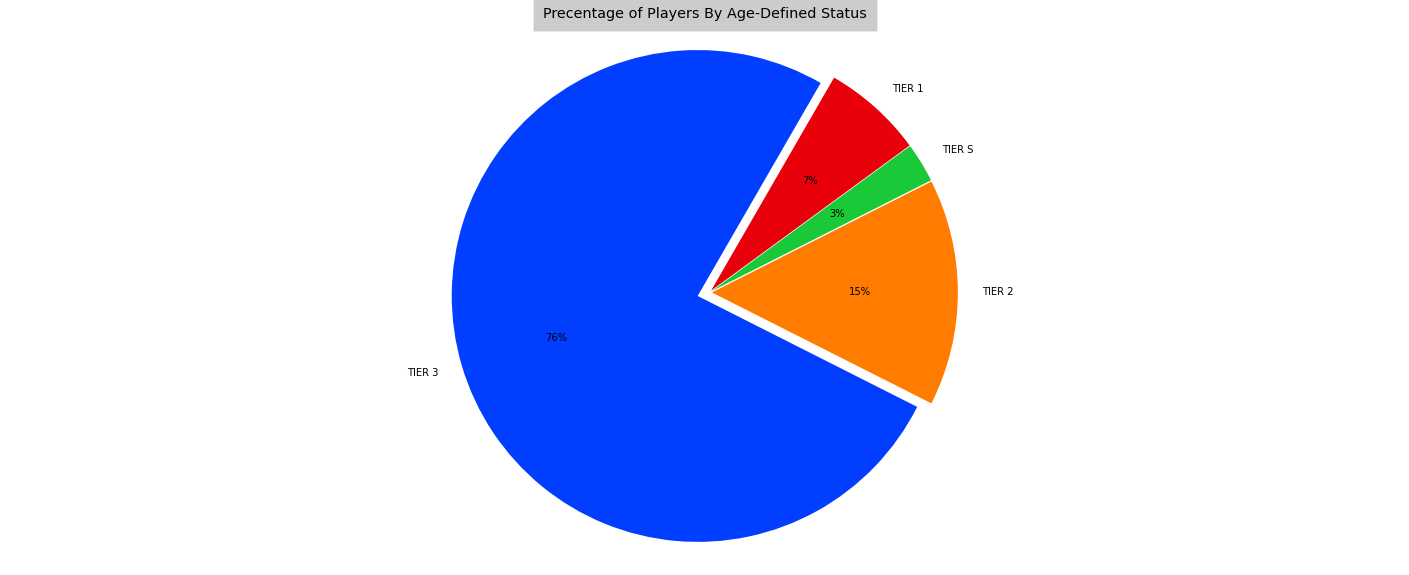

In [16]:
passing = passingTableDF.apply(lambda e : definedTiers(e['Pos'], int(e['Yds'])), axis =1);
rushing = rushingTableDF.apply(lambda e : definedTiers(e['Pos'], int(e['Yds'])), axis =1);
receiving = receivingTableDF.apply(lambda e : definedTiers(e['Pos'], int(e['Yds'])), axis =1);
series = [pd.Series(passing.value_counts()),
pd.Series(rushing.value_counts()),
pd.Series(receiving.value_counts())
]
tierList = pd.DataFrame(series)

exp = []
labels = list(tierList.value_counts().keys().names)
# print(labels)
for i in range(len(labels)):
    exp.append(0.01);
exp[0] = 0.05;
plt.style.use('ggplot');
explode = exp;
plt.figure(figsize=(25,10));
colors = sns.color_palette('bright')[0:len(labels)]
plt.title("Precentage of Players By Age-Defined Status", bbox={'facecolor':'0.8', 'pad':10})
plt.pie(tierList.sum(), explode, labels, colors = colors, autopct='%0.00f%%', shadow=False, startangle=-300)
plt.axis('equal')
plt.show()


<h3 style="color:cyan">Scatter Plot to Visualize the Relation between the QB's <b>Yards<br> and <b>Touchdowns<b>
<label style='text-decoration:underline' >(Min. 25 Attempts)</label></h3>

In [17]:
######### If the Color Scheme is difficult to read, please re-run the scenario ##########
fig = px.scatter(passers, x = passers['Yds'], y=passers['TD'], color=passers['Player'], size=passers['TD'],
                 title = "Quarterback's Yards and Touchdowns",labels = {"x": "Yards", "y": "Touchdowns", "color":"Name"})
fig.update_layout(
    margin=dict(l=20, r=20, t=35, b=20),
    paper_bgcolor=getColour(),
)
fig.show()

<h1> Scatter plot to Visualize the Rushers for Yards and Touchdowns (min. 25 Rush Attempts)</h1>

In [18]:
######### If the Color Scheme is difficult to read, please re-run the scenario ##########
fig = px.scatter(rushers, x = rushers['Yds'], y=rushers['TD'], color=rushers['Player'], size=rushers['TD'],
                 title = "Running Back's Yards and Touchdowns",labels = {"x": "Yards", "y": "Touchdowns", "color":"Name"})
fig.update_layout(
    margin=dict(l=20, r=20, t=35, b=20),
    paper_bgcolor=getColour(),
)
fig.show()

<h1>Scatter plot to visualize the Receivers for Yards and Touchdowns (min. 25 Receptions) </h1>

In [19]:
######### If the Color Scheme is difficult to read, please re-run the scenario ##########
fig = px.scatter(receivers, x = receivers['Yds'], y=receivers['TD'], color=receivers['Player'], size=receivers['Rec'],
                 title = "Receivers Yards and Touchdowns",labels = {"x": "Yards", "y": "Touchdowns", "color":"Name","size":"Receptions"})
fig.update_layout(
    margin=dict(l=20, r=20, t=35, b=20),
    paper_bgcolor=getColour(),
)
fig.show()

<h1> Scatter Chart to visualize names of those in the Pro Bowl </h1>

In [20]:
######### If the Color Scheme is difficult to read, please re-run the scenario ##########
qbPro = passers[passingTableDF['Player'].str.contains('\*')]
rbPro = rushers[rushingTableDF['Player'].str.contains('\*')]
wrPro = receivers[receivingTableDF['Player'].str.contains('\*')]

data = [(qbPro),
(rbPro),
(wrPro)]

qbFig = px.scatter(data[0], x = data[0].Yds, y=data[0].TD, color=data[0].Player, size=data[0].TD, symbol=data[0].Pos,
                 title = "Pro Bowl Players Yards and Touchdowns",labels = {"x": "Yards", "y": "Touchdowns", "color":"Player", "symbol":"Position"})
rbFig = px.scatter(data[1], x = data[1].Yds, y=data[1].TD, color=data[1].Player, size=data[1].TD, symbol=data[1].Pos,
                 title = "Pro Bowl Players Yards and Touchdowns",labels = {"x": "Yards", "y": "Touchdowns", "color":"Player", "symbol":"Position"})
wrFig = px.scatter(data[2], x = data[2].Yds, y=data[2].TD, color=data[2].Player, size=data[2].TD, symbol=data[2].Pos,
                 title = "Pro Bowl Players Yards and Touchdowns",labels = {"x": "Yards", "y": "Touchdowns", "color":"Player", "symbol":"Position"})
fig = go.Figure(data=qbFig.data+rbFig.data+wrFig.data)


# fig = px.scatter(data, x = data['Yds'], y=data['TD'], color=data['Player'], size=data['TD'], symbol=data['Pos'],
#                  title = "Pro Bowl Players Yards and Touchdowns",labels = {"x": "Yards", "y": "Touchdowns", "color":"Player", "symbol":"Player"})

fig.update_layout(
    margin=dict(l=20, r=20, t=35, b=50),
    paper_bgcolor=getColour(),
)
fig.update_xaxes(title_text='Yards');
fig.update_yaxes(title_text='Touchdowns');
fig.update_layout(legend_title_text = "Player,Position")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [21]:
qbSelection = widgets.Dropdown(options = data[0].Pos + "," + data[0].Player,
                                     value=data[0].Pos[0] + "," + data[0].Player[0], description="Select QB Pro Bowl Player",
                                     style=dict(description_width='initial'),  layout=dict(width='350px'))


# qbSelection

In [22]:
rbSelection = widgets.Dropdown(options = data[1].Pos+ "," + data[1].Player,
                                     value=data[1].Pos[0]+ "," + data[1].Player[0], description="Select RB Pro Bowl Player",
                                     style=dict(description_width='initial'),  layout=dict(width='350px'))
# rbSelection

In [23]:
wrSelection = widgets.Dropdown(options = data[2].Pos+ "," + data[2].Player,
                                     value=data[2].Pos[0]+ "," + data[2].Player[0], description="Select WR Pro Bowl Player",
                                     style=dict(description_width='initial'),  layout=dict(width='350px'))
# wrSelection

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



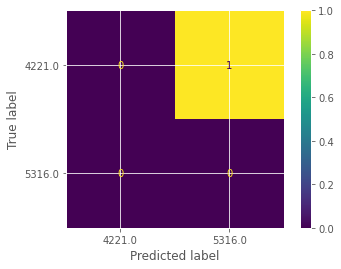

In [24]:
####################### MODEL-PREDICTION-SECTION #############################
########## Scenario -- Trying to have the model predict what TIER a Given Player is based on their Position and their Yards. 
########## Model should be able to predict which Player Belongs to Which Tier
########## Question: Do i need to create and setup a custome DataFrame object that holds the fields ['Player', 'Pos', 'Yds', 'Tier'] ?
########## Question: Is there a way to train the model by using two criterias (i.e -> Yards and Position). 

df = data[0]
mylog_model = linear_model.LogisticRegression(max_iter=15000)
y = df.select_dtypes(include=['number']).values[:,5]
# y = y.astype('int')
X = df.select_dtypes(include=['number']).values[:,5:6]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=1)

# develop model
mylog_model.fit(X_train, y_train)
y_pred = mylog_model.predict(X_test)

metrics.plot_confusion_matrix(mylog_model, X_test, y_test)



In [25]:
def getSelectionChange(selection):
  name = selection.split(",")[1].strip()
  pos = selection.split(",")[0].strip()
  if "QB" in pos or "Tom Brady" in name:
    tc = fantasyPassingCols
  elif "RB" in pos:
    tc = fantasyRushingCols
  elif "WR" in pos:
    tc = fantasyReceivingCols;
  
  df = extractDatasetToDF(getUrlFromPlayer(name),'stats', tc, "")
  return df[0:17:]
    # test1 = df.loc[(df['test preparation course'] == 'none') & (df['parental level of education'] == education_level)]
    # dataFrame1 = test1.groupby('parental level of education').mean().round(2)
    # test2 = df.loc[(df['test preparation course'] == 'completed') & (df['parental level of education'] == education_level)]
    # dataFrame2 = test2.groupby('parental level of education').mean().round(2)
    # result = dataFrame1.compare(dataFrame2, align_axis=0).rename(index={'self': 'No Prep', 'other': 'With prep'})

getSelectionChange(data[2].Pos[0]+ "," + data[2].Player[0])


https://www.pro-football-reference.com/players/K/KUPPCO00/gamelog/2021/


,Date,G#,Week,Age,Tm,,Opp,Result,GS,Tgt,...,FR,Fmb_Yds,Fmb_TD,Off_Num,Off_Pct,Def_Num,Def_Pct,ST_Num,ST_Pct,Status
0,2021-09-12,1,1,28.089,LAR,,CHI,W 34-14,*,10,...,,1,6,0.0,0,0,0,0,0,49
1,2021-09-19,2,2,28.096,LAR,@,IND,W 27-24,*,11,...,,2,12,0.0,0,0,0,0,0,59
2,2021-09-26,3,3,28.103,LAR,,TAM,W 34-24,*,12,...,,2,12,0.0,0,0,0,0,0,53
3,2021-10-03,4,4,28.110,LAR,,ARI,L 20-37,*,13,...,,0,0,0.0,0,0,0,0,0,65
4,2021-10-07,5,5,28.114,LAR,@,SEA,W 26-17,*,10,...,,0,0,0.0,0,0,0,0,0,59
5,2021-10-17,6,6,28.124,LAR,@,NYG,W 38-11,*,12,...,,2,12,0.0,1,0,1,0,0,55
6,2021-10-24,7,7,28.131,LAR,,DET,W 28-19,*,13,...,,2,12,0.0,0,0,0,0,0,63
7,2021-10-31,8,8,28.138,LAR,@,HOU,W 38-22,*,9,...,,1,6,0.0,0,0,0,0,0,58
8,2021-11-07,9,9,28.145,LAR,,TEN,L 16-28,*,13,...,,0,0,0.0,0,0,0,0,0,78
9,2021-11-15,10,10,28.153,LAR,@,SFO,L 10-31,*,13,...,,0,0,0.0,0,0,0,0,0,55


In [26]:
def display(selection):
  plt.style.use('fivethirtyeight')
  selectionChange = getSelectionChange(selection)
  selectionChange.plot(kind='barh', stacked=True, figsize=(25, 17), fontsize=20)
  plt.title("Player Game-By-Game Results for 2021", fontsize=25)
  plt.xlabel('Games', fontsize=25)
  plt.ylabel("Statistics", fontsize=25)
  plt.legend(loc='lower right', fontsize=20)
  
# display(data[2].Pos[0]+ "," + data[2].Player[0])

In [27]:
# widgets.interact(getSelectionChange, selection =rbSelection)
widgets.interact(display, selection = rbSelection)

interactive(children=(Dropdown(description='Select RB Pro Bowl Player', layout=Layout(width='350px'), options=…

<function __main__.display>

# New Section